<a href="https://colab.research.google.com/github/ClaudioRob/controle-acervo-biblioteca-ufrn/blob/main/7_Days_of_Code_Alura_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados do Acervo - Empréstimos

##### Dia_1-Importando_dados

In [170]:
import requests
import pandas as pd

In [171]:
# URL base do repositório no GitHub
api_url = "https://api.github.com/repos/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/contents/Dia_1-Importando_dados/Datasets/dados_emprestimos"

In [172]:
# Obter a lista de arquivos no diretório
response = requests.get(api_url)
files = response.json()

In [173]:
# Lista para armazenar os DataFrames importados
dataframes = []

In [174]:
# Filtrar e ler arquivos CSV
for file in files:
    if file['name'].endswith('.csv'):
        file_url = file['download_url']
        df = pd.read_csv(file_url)
        dataframes.append(df)
        print(f"Sucesso ao importar {file['name']}")

Sucesso ao importar emprestimos-20101.csv
Sucesso ao importar emprestimos-20102.csv
Sucesso ao importar emprestimos-20111.csv
Sucesso ao importar emprestimos-20112.csv
Sucesso ao importar emprestimos-20121.csv
Sucesso ao importar emprestimos-20122.csv
Sucesso ao importar emprestimos-20131.csv
Sucesso ao importar emprestimos-20132.csv
Sucesso ao importar emprestimos-20141.csv
Sucesso ao importar emprestimos-20142.csv
Sucesso ao importar emprestimos-20151.csv
Sucesso ao importar emprestimos-20152.csv
Sucesso ao importar emprestimos-20161.csv
Sucesso ao importar emprestimos-20162.csv
Sucesso ao importar emprestimos-20171.csv
Sucesso ao importar emprestimos-20172.csv
Sucesso ao importar emprestimos-20181.csv
Sucesso ao importar emprestimos-20182.csv
Sucesso ao importar emprestimos-20191.csv
Sucesso ao importar emprestimos-20192.csv
Sucesso ao importar emprestimos-20201.csv


Concatenando Datafremes

In [175]:
# Concatenar todos os DataFrames em um único DataFrame
emprestimos = pd.concat(dataframes, ignore_index=True)

Total de Registros

In [176]:
# Contar o número total de registros
total_registros = emprestimos.shape[0]
print(f"Número total de registros no DataFrame concatenado: {total_registros}")

Número total de registros no DataFrame concatenado: 2258018


In [177]:
# Exibir os primeiros registros do DataFrame concatenado para verificação
print("DataFrame concatenado a partir dos CSVs:")
print(emprestimos.head())

DataFrame concatenado a partir dos CSVs:
   id_emprestimo codigo_barras                 data_renovacao  \
0         709684       L095049                            NaN   
1         709685       L167050                            NaN   
2         709686    2006017618  2010/01/26 08:07:01.738000000   
3         709687       L184117  2010/01/18 11:07:46.470000000   
4         709684       L095049                            NaN   

                 data_emprestimo                 data_devolucao  \
0  2010/01/04 07:44:10.721000000  2010/01/05 16:26:12.662000000   
1  2010/01/04 07:44:10.750000000  2010/01/12 07:34:13.934000000   
2  2010/01/04 08:08:44.081000000  2010/02/25 07:36:25.800000000   
3  2010/01/04 08:24:21.284000000  2010/02/03 08:58:45.692000000   
4  2010/01/04 07:44:10.721000000  2010/01/05 16:26:12.662000000   

   matricula_ou_siape    tipo_vinculo_usuario  
0        2.008023e+09      ALUNO DE GRADUAÇÃO  
1        2.008023e+09      ALUNO DE GRADUAÇÃO  
2        2.008112e+09

Estrutura dataframe emprestimos

In [178]:
# Verificar a estrutura do DataFrame emprestimos
print("Estrutura do DataFrame emprestimos:")
print(emprestimos.info())

Estrutura do DataFrame emprestimos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258018 entries, 0 to 2258017
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 120.6+ MB
None


Verificando Duplicatas

In [179]:
# Verificar duplicatas
duplicates = emprestimos.duplicated()
print(f"Número de duplicatas nos CSVs: {duplicates.sum()}")

Número de duplicatas nos CSVs: 37


Removendo Duplicatas

In [180]:
# Verificar duplicatas e remover duplicatas se necessário
emprestimos = emprestimos.drop_duplicates()

Validando exclusao de registros duplicados

In [181]:
# Verificar duplicatas
duplicates = emprestimos.duplicated()
print(f"Número de duplicatas nos CSVs: {duplicates.sum()}")

Número de duplicatas nos CSVs: 0


Dados do Acervo - Exemplares

In [182]:
# Carregar o DataFrame a partir do arquivo Parquet
parquet_url = 'https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet'
exemplares = pd.read_parquet(parquet_url)
print(exemplares.head())

       id_exemplar codigo_barras            colecao  \
index                                                 
0                5       L000003  Acervo Circulante   
1                4       L000002  Acervo Circulante   
2                3       L000001  Acervo Circulante   
3                7       L000114  Acervo Circulante   
5               10       L000041  Acervo Circulante   

                           biblioteca status_material  localizacao  \
index                                                                
0      Biblioteca Central Zila Mamede         REGULAR          694   
1      Biblioteca Central Zila Mamede         REGULAR          688   
2      Biblioteca Central Zila Mamede        ESPECIAL          638   
3      Biblioteca Central Zila Mamede         REGULAR          616   
5      Biblioteca Central Zila Mamede        ESPECIAL          657   

       registro_sistema  
index                    
0                     1  
1                     1  
2                  

Unindo os Dataframes (merge)

In [183]:
# Assegurar que 'codigo_barras' seja uma coluna em ambos os DataFrames
if 'codigo_barras' in exemplares.index.names:
    exemplares.reset_index(inplace=True)

if 'codigo_barras' in emprestimos.index.names:
    emprestimos.reset_index(inplace=True)

In [184]:
# Mesclar os DataFrames emprestimos e exemplares pela coluna 'codigo_barras'
emprestimos_completo = pd.merge(emprestimos, exemplares, on='codigo_barras', how='inner')

In [185]:
# Contar o número total de registros no DataFrame final
total_registros_final = emprestimos_completo.shape[0]
print(f"Número total de registros no DataFrame final: {total_registros_final}")

Número total de registros no DataFrame final: 2072522


### Dia_2_As_primeiras_manipulacoes

In [186]:
import pandas as pd

In [187]:
emprestimos_completo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009


In [188]:
# # Definindo a lista CDU_lista
# CDU_lista = []
# for CDU in emprestimos_completo['localizacao']:
#   if (CDU < 100):
#     CDU_lista.append('Generalidades')
#   elif (CDU < 200):
#     CDU_lista.append('Filosofia e Psicologia')
#   elif (CDU < 300):
#     CDU_lista.append('Ciências Sociais')
#   elif (CDU < 400):
#     CDU_lista.append('Classe vaga. Provisoriamente não ocupada.')
#   elif (CDU < 500):
#     CDU_lista.append('Matemática e ciências naturais')
#   elif (CDU < 600):
#     CDU_lista.append('Ciências aplicadas')
#   elif (CDU < 700):
#     CDU_lista.append('Belas artes')
#   elif (CDU < 800):
#     CDU_lista.append('Linguagem')
#   elif (CDU < 900):
#     CDU_lista.append('Geografia. Biografia. História.')
#   else:
#     CDU_lista.append('Generalidades')

# emprestimos_completo['CDU_geral'] = CDU_lista

In [189]:
# Definindo a lista CDU_lista
CDU_lista = [
    (0, 99, "Generalidades. Ciência e conhecimento."),
    (100, 199, "Filosofia e psicologia."),
    (200, 299, "Religião."),
    (300, 399, "Ciências sociais."),
    (400, 499, "Classe vaga. Provisoriamente não ocupada."),
    (500, 599, "Matemática e ciências naturais."),
    (600, 699, "Ciências aplicadas."),
    (700, 799, "Belas artes."),
    (800, 899, "Linguagem. Língua. Linguística."),
    (900, 999, "Geografia. Biografia. História.")
]

In [190]:
# Função para classificar o código de localização
def classificar_localizacao(codigo):
    for inicio, fim, descricao in CDU_lista:
        if inicio <= codigo <= fim:
            return descricao
    return "Código fora do intervalo especificado"

In [191]:
# Supondo que você já tem o DataFrame emprestimos_completo
# emprestimos_completo = pd.read_csv('caminho/para/seu/dataframe.csv')  # Se você estiver lendo o DataFrame de um arquivo

# Aplicando a função de classificação ao DataFrame
emprestimos_completo['localizacao'] = emprestimos_completo['localizacao'].apply(classificar_localizacao)

# Exibindo o DataFrame resultante
print("DataFrame após substituição dos códigos:")
emprestimos_completo.head()

DataFrame após substituição dos códigos:


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,4225
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,4225
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,25009
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,25009
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,25009


In [192]:
# Excluindo a coluna 'registro_sistema'
emprestimos_completo = emprestimos_completo.drop(columns=['registro_sistema'])

In [193]:
# Convertendo a coluna 'matricula_ou_siape' para string
emprestimos_completo['matricula_ou_siape'] = emprestimos_completo['matricula_ou_siape'].astype(str)


In [194]:
# Exibindo o DataFrame resultante
print("DataFrame após as alterações:")
emprestimos_completo.head()

DataFrame após as alterações:


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.


### Dia_3_Explorando_o_Datetime_dos_dados

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [196]:
emprestimos_completo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.


In [197]:
# Verificando a relação entre emprestimo e exemplar
emprestimos_completo['id_emprestimo'].value_counts()

id_emprestimo
2010326     3
2014596     3
10240112    3
2422542     3
9690168     3
           ..
2767562     1
2317930     1
2283256     1
2262867     1
2989061     1
Name: count, Length: 2068724, dtype: int64

In [213]:
# localizando cada empréstimo por emprestimo de exemplares
emprestimos_completo.loc[emprestimos_completo['id_emprestimo']==2010326]

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,data
1594544,2010326,2010082015,NaN,2015/06/02 17:56:18.917000000,2015/06/19 15:42:51.000000000,2010023153.0,ALUNO DE GRADUAÇÃO,1055921,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2012-03-15 09:43:03.368
1594545,2010326,2010082015,NaN,2015/06/02 17:56:18.917000000,2015/06/19 15:42:51.000000000,2010023153.0,ALUNO DE GRADUAÇÃO,1055569,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2012-02-14 14:49:09.967
1594546,2010326,2010082015,NaN,2015/06/02 17:56:18.917000000,2015/06/19 15:42:51.000000000,2010023153.0,ALUNO DE GRADUAÇÃO,1056359,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências sociais.,2017-06-02 18:20:40.976


In [237]:
# eliminando empréstimos duplicados
emprestimo = len(emprestimos_completo['id_emprestimo'].drop_duplicates())

In [254]:
# total de exemplares emprestados
exemplares = len(emprestimos_completo)
exemplares

2072522

In [265]:
# agrupando exemplares emprestados por data
emprestimos_data = pd.DataFrame(emprestimos_completo['data'].value_counts()).reset_index()
emprestimos_data.columns = ['data', 'quantidade']

In [266]:
# quantidade total de emprestimos por ano
emprestimos_data['data'] = pd.to_datetime(emprestimos_data['data'])
emprestimos_data['ano'] = emprestimos_data['data'].dt.year
emprestimos_por_ano = emprestimos_data.groupby('ano').sum(numeric_only=True)
emprestimos_por_ano

,quantidade
ano,
2010,161277
2011,196199
2012,221141
2013,234431
2014,218765
2015,213117
2016,215411
2017,217974
2018,193547


In [228]:
# Configurando os temos dos gráficos

sns.set_theme(context='notebook',
              style='darkgrid',
              palette='deep',
              font_scale=1.3,
              rc={"figure.figsize":(15,8)})

Text(0.0, 1.0, 'Quantidade de exemplares emprestados do SISBI por ano\n')

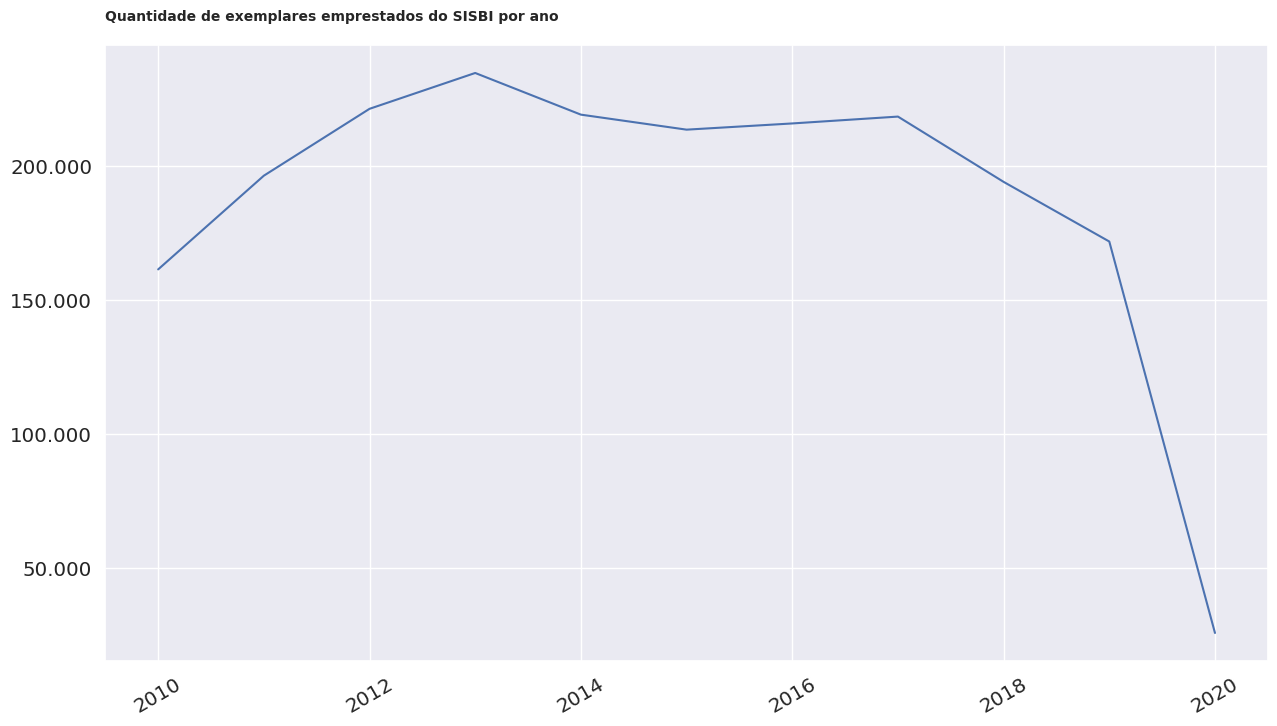

In [229]:
ax = sns.lineplot(data=emprestimos_por_ano,x='ano',y='quantidade')
ax.set(xlabel=None, ylabel=None)
ax.tick_params(axis='x', rotation=30)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))

ax.set_title('Quantidade de exemplares emprestados do SISBI por ano'+'\n', size=10, loc='left', weight='bold')

## Análises:
Pode-se perceber que desde 2013 os números de exemplares emprestados está diminuindo, com uma queda bem grande em 2019. O ano de 2020 não pode ser avaliado igual, devido ao período da quantidade de dados. É importante a direção da biblioteca investigar o que está ocorrendo desde 2013 com os procedimentos realizados.

Alguns questionamentos importantes que deve-se levar a direção, para que seja aprofundada em outra análise:

* O número de alunos da universidade vem diminuindo?
* Como está a pesquisa de satisfação dos usuários da biblioteca?
* O acervo está atualizado?
* Quais são as estratégias de marketing que a biblioteca está realizando?
* O que ocorreu de diferente em 2017 em relação a 2016 e 2015 para que o número tenha se elevado?
* E em 2019?

In [267]:
# Quantos empréstimos foram por mês
import pandas as pd

emprestimos_data['data'] = pd.to_datetime(emprestimos_data['data'])
emprestimos_data['mes'] = emprestimos_data['data'].dt.month
# emprestimos_por_mes = emprestimos_data.groupby('mes').sum(numeric_only=True)
emprestimos_por_mes = emprestimos_data['mes'].value_counts().reset_index()
# emprestimos_por_mes = emprestimos_data.groupby('mes')['emprestimos'].sum().reset_index()
emprestimos_por_mes.columns = ['mes', 'quantidade']
print(emprestimos_por_mes)

    mes  quantidade
0     3      251710
1     8      232371
2     2      209839
3     4      208339
4     9      207875
5     5      202139
6    10      188076
7    11      163907
8     6      137815
9     7      123588
10   12       75641
11    1       67391


In [287]:
# emprestimos_data['data'] = pd.to_datetime(emprestimos_data['data'])
# emprestimos_data['mes'] = emprestimos_data['data'].dt.month
emprestimos_por_mes = emprestimos_data.groupby(by=emprestimos_data.data.dt.month)
emprestimos_por_mes = emprestimos_data.groupby('mes').sum(numeric_only=True)
emprestimos_por_mes

,quantidade,ano
mes,,
1,67391,135776608
2,209839,422830808
3,251710,507153437
4,208339,419703549
5,202139,407212283
6,137815,277632784
7,123588,249019102
8,232371,468131061
9,207875,418731887
